In [79]:
from itertools import islice

import numpy as np
from scipy.signal import stft, istft
from scipy.io import wavfile
from scipy.linalg import norm
import matplotlib.pyplot as plt
from IPython.display import display, Audio
from sklearn.cluster import SpectralClustering

from magnolia.features.mixer import FeatureMixer
from magnolia.features.spectral_features import reconstruct

%matplotlib inline

In [2]:
ls_data='/local_data/teams/magnolia/librispeech/processed_dev-clean.h5'
fmix = FeatureMixer([ls_data, ls_data], shape=(70, None))

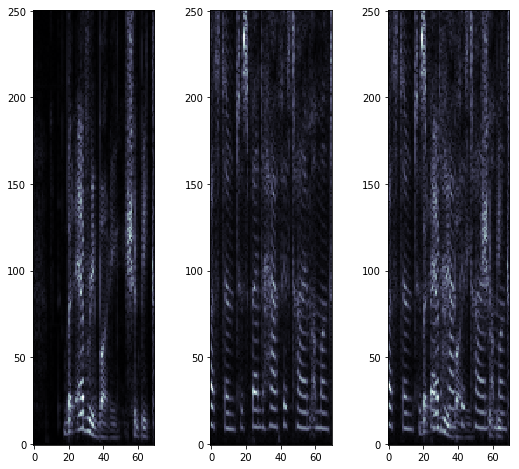

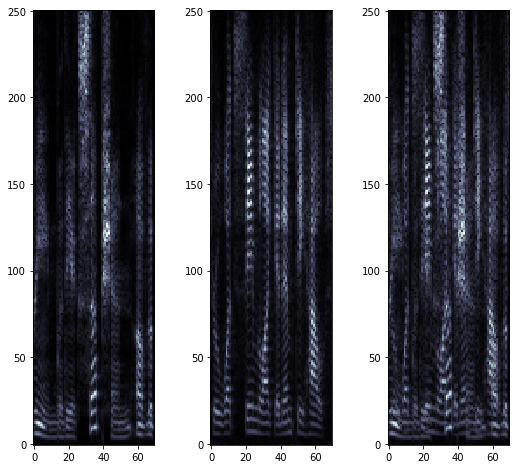

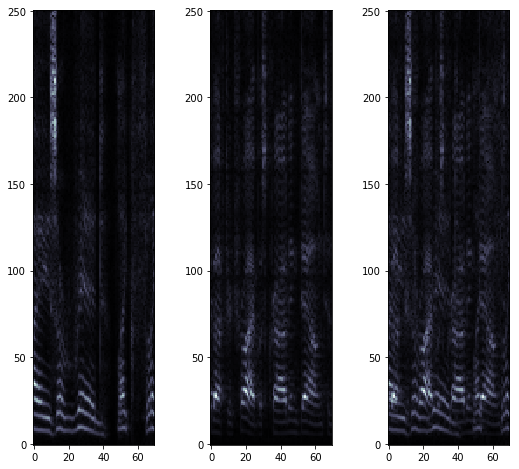

In [3]:
for mix, wav1, wav2 in islice(fmix, 3):
    plt.figure(figsize=(9,8))
    plt.subplot(1,3,1)
    plt.imshow(np.sqrt(np.abs(wav2.T)), origin='lower', cmap='bone')
    plt.subplot(1,3,2)
    plt.imshow(np.sqrt(np.abs(wav1.T)), origin='lower', cmap='bone')
    plt.subplot(1,3,3)
    plt.imshow(np.sqrt(np.abs(mix.T)), origin='lower', cmap='bone')


In [4]:
from magnolia.factorization.ica import ica

Automatic pdb calling has been turned OFF


Size of reconstruction (17250) does not match value of deprecated recon_size parameter (1.7750000000000001).


(251,)


Size of reconstruction (17250) does not match value of deprecated recon_size parameter (1.7750000000000001).


Size of reconstruction (17250) does not match value of deprecated recon_size parameter (1.7750000000000001).


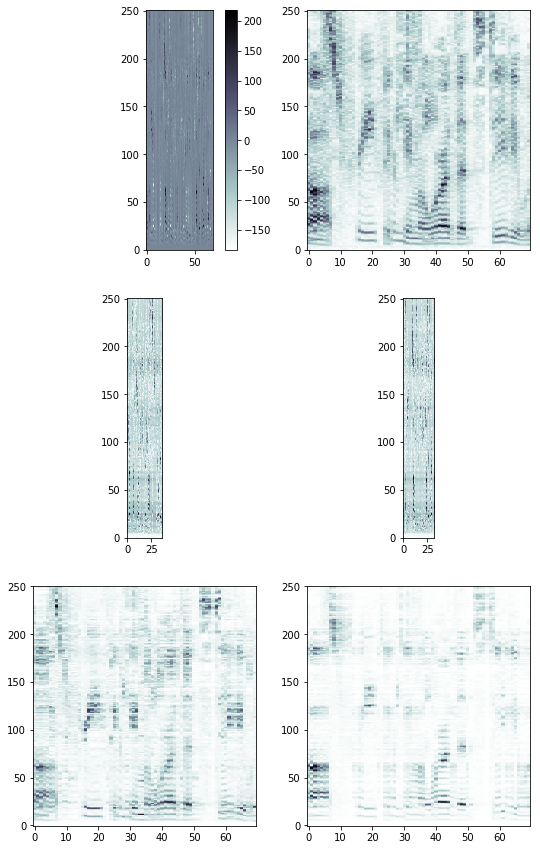

In [136]:
%pdb off
for mix, wav1, wav2 in islice(fmix, 1):
    spclust = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
    est_mix, m = ica(np.abs(mix.T), sigdim=1, n_components=70)
    cluster_labels = spclust.fit_predict(est_mix.T)
    
    plt.figure(figsize=(9,15))
    plt.subplot(3,2,1)
    plt.imshow(est_mix, cmap='bone_r', origin='lower', aspect=1.0)
    plt.colorbar()
    plt.subplot(3,2,2)
    plt.imshow(np.sqrt(np.abs(mix.T)), cmap='bone_r', origin='lower', aspect=0.3)
    plt.subplot(3,2,3) 
    # ICA components in cluster 0
    comp_0_vecs = est_mix.T[np.nonzero(cluster_labels==0)]
    #comp_0_vecs = np.where(cluster_labels==0, est_mix, 0)
    comp_0 = np.mean(comp_0_vecs, axis=0)
    #
    plt.imshow(np.sqrt(np.abs(comp_0_vecs.T)), cmap='bone_r', origin='lower')
    plt.subplot(3,2,4)
    # ICA components in cluster 1
    comp_1_vecs = est_mix.T[np.nonzero(cluster_labels==1)]
    #comp_1_vecs = np.where(cluster_labels==1, est_mix, 0)
    comp_1 = np.mean(comp_1_vecs, axis=0)
    print(comp_1.shape)
    plt.imshow(np.sqrt(np.abs(comp_1_vecs.T)), cmap='bone_r', origin='lower')
    
    which_comp_0_closest = np.argmax(np.abs(mix) @ comp_0_vecs.T, 1)
    which_comp_1_closest = np.argmax(np.abs(mix) @ comp_1_vecs.T, 1)
    
    spec_a = np.abs(comp_0_vecs[which_comp_0_closest])/np.max(comp_0_vecs) * np.abs(mix)
    spec_b = np.abs(comp_1_vecs[which_comp_1_closest])/np.max(comp_1_vecs) * np.abs(mix)
    
    plt.subplot(3,2,5)
#     spec_a = mix * comp_0/norm(comp_0)
    plt.imshow(np.sqrt(np.abs(spec_a.T)), cmap='bone_r', origin='lower', aspect=0.3)
    plt.subplot(3,2,6)
#     mix_b = np.where(mix <= 0, -mix, 0)
#     spec_b = mix * comp_1/norm(comp_1)
    plt.imshow(np.sqrt(np.abs(spec_b.T)), cmap='bone_r', origin='lower', aspect=0.3)
    
    orig = reconstruct(mix, mix, 10000, 0.05, 0.025)
    display(Audio(orig, rate=10000))
    rcn_a = reconstruct(spec_a, mix, 10000, 0.05, 0.025)
    display(Audio(rcn_a, rate=10000))
    rcn_b = reconstruct(spec_b, mix, 10000, 0.05, 0.025)
    display(Audio(rcn_b, rate=10000))

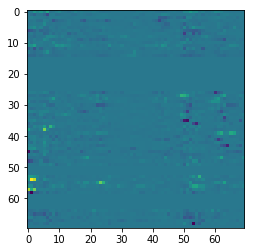

In [35]:
plt.imshow(np.where(cluster_labels==1, est_mix, 0).T)

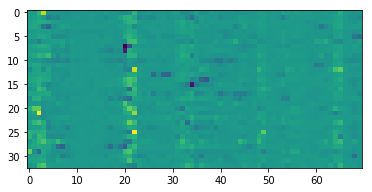

In [42]:
plt.imshow(est_mix.T[np.nonzero(cluster_labels)])

In [97]:
which_comp_0_closest = np.argmax(np.abs(mix) @ comp_0_vecs.T, 1)
which_comp_1_closest = np.argmax(np.abs(mix) @ comp_1_vecs.T, 1)

array([ 7, 15, 17,  5,  5,  5,  5,  7, 15, 11, 15, 15, 15,  5,  5,  5,  5,
       11, 11, 27, 24, 24, 24, 24, 17, 15, 15, 15, 15, 15, 15,  5,  5,  5,
        5, 13, 15, 13, 24, 24, 13, 13, 17, 17,  7, 15,  2, 19, 19, 15, 17,
       17, 13,  2, 13, 17, 17,  2,  2, 15, 15, 17, 17, 13, 13, 13, 13, 17,
       17, 17])

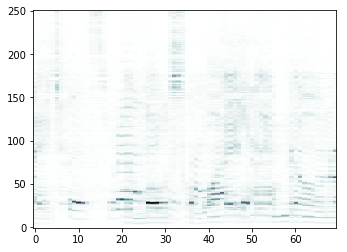

In [114]:
plt.imshow(np.sqrt(np.abs(comp_0_vecs[which_comp_0_closest]/norm(comp_0_vecs)) * np.abs(mix)).T,origin='lower',aspect=0.2,cmap='bone_r')

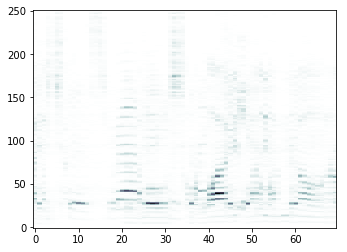

In [128]:
plt.imshow(np.sqrt(np.abs(comp_1_vecs[which_comp_1_closest])/np.max(comp_1_vecs) * np.abs(mix)).T,origin='lower',aspect=0.2,cmap='bone_r')

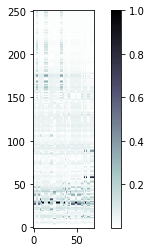

In [125]:
plt.imshow((np.abs(comp_0_vecs[which_comp_0_closest])/np.max(comp_0_vecs)).T,origin='lower',cmap='bone_r')
plt.colorbar()

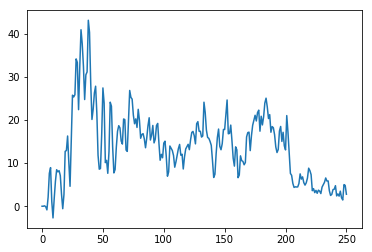

In [77]:
plt.plot(comp_1 - comp_0)